In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from catboost import CatBoostClassifier

In [60]:
df = pd.read_csv('Documents\heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [62]:
df.shape

(303, 14)

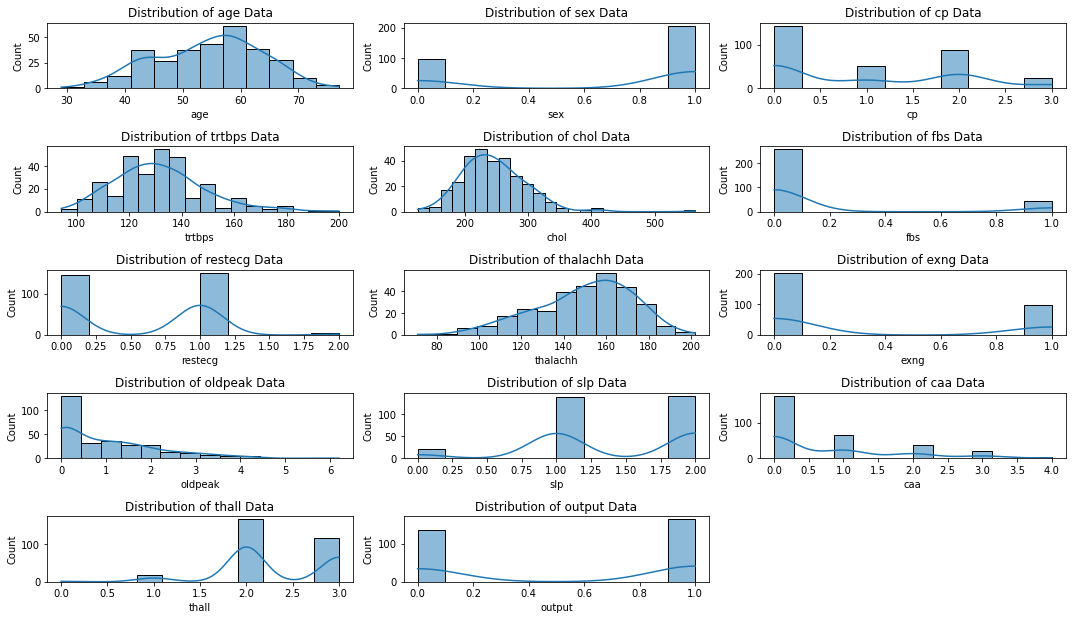

In [63]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(6,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

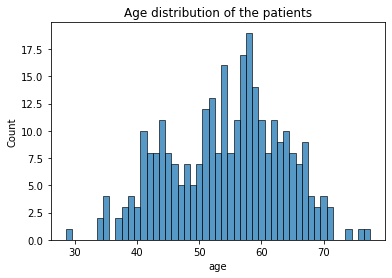

In [6]:
sns.histplot(df.age, discrete=True)
plt.title('Age distribution of the patients')
plt.show()

In [7]:
df.sex.value_counts().to_frame()

,sex
1,207
0,96


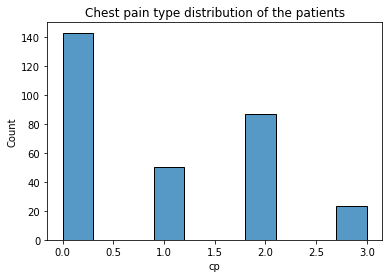

In [8]:
sns.histplot(df.cp)
plt.title('Chest pain type distribution of the patients')
plt.show()

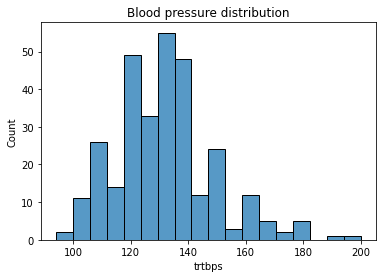

In [9]:
sns.histplot(df.trtbps)
plt.title('Blood pressure distribution')
plt.show()

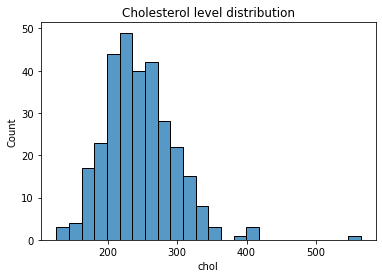

In [10]:
sns.histplot(df.chol)
plt.title('Cholesterol level distribution')
plt.show()

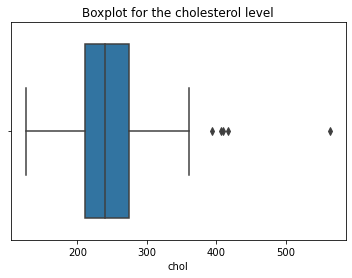

In [11]:
sns.boxplot(data=df, x='chol')
plt.title('Boxplot for the cholesterol level')
plt.show()

In [12]:
df.fbs.value_counts().to_frame()

,fbs
0,258
1,45


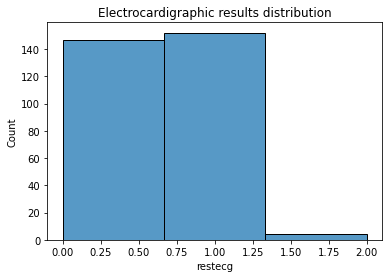

In [13]:
sns.histplot(df.restecg, bins=3)
plt.title('Electrocardigraphic results distribution')
plt.show()

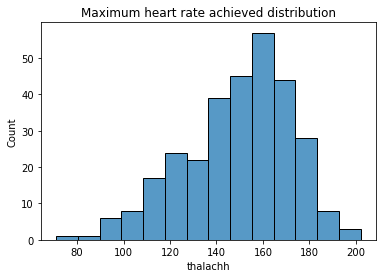

In [14]:
sns.histplot(df.thalachh)
plt.title('Maximum heart rate achieved distribution')
plt.show()

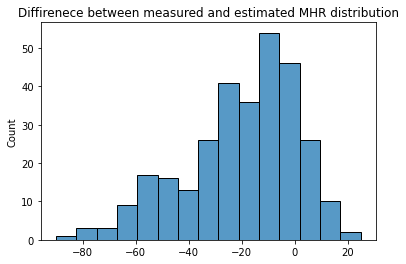

In [15]:
sns.histplot(df.thalachh - (208 - (0.7 * df.age)))
plt.title('Diffirenece between measured and estimated MHR distribution')
plt.show()

In [16]:
df.exng.value_counts().to_frame()

,exng
0,204
1,99


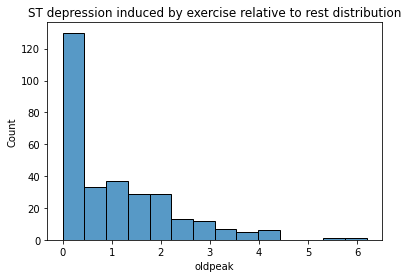

In [17]:
sns.histplot(df.oldpeak)
plt.title('ST depression induced by exercise relative to rest distribution')
plt.show()

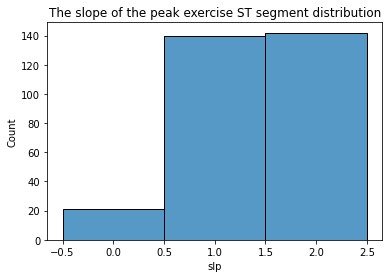

In [18]:
sns.histplot(df.slp, discrete=True)
plt.title('The slope of the peak exercise ST segment distribution')
plt.show()

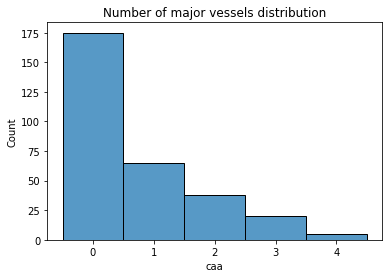

In [19]:
sns.histplot(df.caa, discrete=True)
plt.title('Number of major vessels distribution')
plt.show()

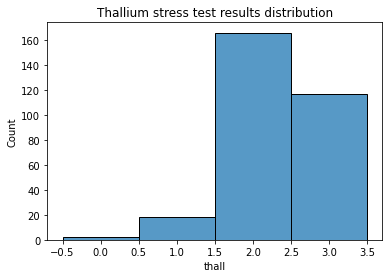

In [20]:
sns.histplot(df.thall, discrete=True)
plt.title('Thallium stress test results distribution')
plt.show()

In [21]:
#Exercise-induced angina
df.exng.value_counts().to_frame()

,exng
0,204
1,99


In [22]:
#The chance of heart attack
df.output.value_counts().to_frame()

,output
1,165
0,138


In [23]:
#54.5% of the patients have a high risk of heart attack, 45.5% 
#- low risk of a heart attack. The classes are relatively balanced. 
#So, in the future, we won't have to worry about the disbalance.
df.output.value_counts(normalize=True).to_frame()

,output
1,0.544554
0,0.455446


In [24]:
df_new = df.copy()

In [25]:
rf_classifier = RandomForestClassifier(max_depth=8,
                                       n_estimators=100,
                                       random_state=42)
rf_classifier.fit(df.drop('output', axis=1), df['output'])

RandomForestClassifier(max_depth=8, random_state=42)

In [26]:
importance = pd.concat([pd.Series(df.columns[:-1]), 
                        pd.Series(rf_classifier.feature_importances_)], axis=1)
importance.columns = ['feature', 'importance']
importance = importance.sort_values(by='importance', ascending=False)
importance

,feature,importance
2,cp,0.140840
7,thalachh,0.128442
12,thall,0.112759
11,caa,0.110391
9,oldpeak,0.104669
0,age,0.083871
3,trtbps,0.075149
4,chol,0.071897
8,exng,0.059953
10,slp,0.052096


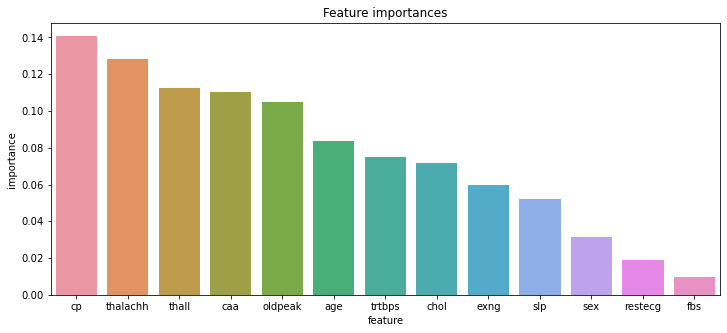

In [27]:
plt.figure(figsize=(12,5))
sns.barplot(data=importance, x='feature', y='importance')
plt.title('Feature importances')
plt.show()

In [28]:
from sklearn.model_selection import cross_val_score
cross_val_score(
    estimator=RandomForestClassifier(max_depth=8,
                                     n_estimators=100,
                                     random_state=42),
    X=df.drop('output', axis=1),
    y=df['output'],
    scoring='f1',
    cv=5
).mean()

0.8506528472990282

In [64]:
#Data Preparation
#Mengecek apa ada data yang kosong / is NULL

df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [30]:
#Dikarenakan Dataset disini tidak ada missing value maka Data preparasi akan lebih simple
#Memisahkan antara Numerical dan Categori Features

In [67]:
num_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa']
cat_features = ['sex', 'cp', 'restecg', 'exng', 'thall','slp','fbs']

In [68]:
features = df_new.drop('output', axis=1)
target = df_new['output'].astype('int')

In [69]:
print(features.shape)
print(target.shape)

(303, 13)
(303,)


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42) 

In [71]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [72]:
#To avoid any conflicts in the fiture we have to transform our categorical features to string type.
X_train[cat_features] = X_train[cat_features].astype('str')
X_test[cat_features] = X_test[cat_features].astype('str')

C:\Users\HERLAMBANG\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [73]:
X_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [75]:
features_ohe = pd.get_dummies(features, drop_first=True, columns=cat_features)

In [76]:
features_ohe.head()

,age,trtbps,chol,thalachh,oldpeak,caa,sex_1,cp_1,cp_2,cp_3,restecg_1,restecg_2,exng_1,thall_1,thall_2,thall_3,slp_1,slp_2,fbs_1
0,63,145,233,150,2.3,0,1,0,0,1,0,0,0,1,0,0,0,0,1
1,37,130,250,187,3.5,0,1,0,1,0,1,0,0,0,1,0,0,0,0
2,41,130,204,172,1.4,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,56,120,236,178,0.8,0,1,1,0,0,1,0,0,0,1,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,1,0,1,0,1,0,0,1,0


In [77]:
features_train, features_test, target_train, target_test = train_test_split(features_ohe, 
                                                                            target, 
                                                                            test_size=0.2,
                                                                            random_state=42)

In [78]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(242, 19)
(61, 19)
(242,)
(61,)


In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_train[num_features] = scaler.fit_transform(features_train[num_features])
features_test[num_features] = scaler.transform(features_test[num_features])

C:\Users\HERLAMBANG\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\HERLAMBANG\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [43]:
#Modeling

In [80]:
from scipy.stats import loguniform
from scipy.stats import uniform
parameters_boost=dict(
    learning_rate=loguniform(0.0001, 0.5),
    iterations=range(10, 500),
    depth=range(3, 12),
    l2_leaf_reg=uniform(1, 20),
    random_strength=loguniform(0.001, 1000)
)

In [46]:
%%time
from sklearn.model_selection import RandomizedSearchCV
random_search_boost = RandomizedSearchCV(
    estimator=CatBoostClassifier(verbose=False, cat_features=cat_features, eval_metric='F1'),
    param_distributions=parameters_boost,
    n_iter=25,
    scoring='f1',
    cv=5,
    random_state=42,
    verbose=1
)
random_search_boost.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Wall time: 12min 54s


RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x00000248AAD4A5E0>,
                   n_iter=25,
                   param_distributions={'depth': range(3, 12),
                                        'iterations': range(10, 500),
                                        'l2_leaf_reg': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000248AA403280>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000248AA419D30>,
                                        'random_strength': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000248AA870BE0>},
                   random_state=42, scoring='f1', verbose=1)

In [81]:
random_search_boost.best_params_

{'depth': 9,
 'iterations': 250,
 'l2_leaf_reg': 7.287119621526534,
 'learning_rate': 0.007606550128725063,
 'random_strength': 278.86810374231203}

In [84]:
catboost_cv_f1 = random_search_boost.best_score_
catboost_cv_f1

0.8534467360602257

In [49]:
best_catboost = random_search_boost.best_estimator_

In [50]:
catboost_pred = best_catboost.predict(X_test)

In [85]:
f1_catboost_test = f1_score(y_test, catboost_pred)
f1_catboost_test

0.870967741935484

In [86]:
final_importance = pd.concat([pd.Series(X_train.columns), 
                              pd.Series(best_catboost.feature_importances_)], axis=1)
final_importance.columns = ['feature', 'importance']
final_importance = final_importance.sort_values(by='importance', ascending=False)
final_importance

,feature,importance
2,cp,22.684710
12,thall,21.960561
10,slp,15.420750
6,restecg,9.627554
11,caa,6.590133
9,oldpeak,5.568629
7,thalachh,3.851985
1,sex,3.372615
8,exng,3.030405
4,chol,2.582160


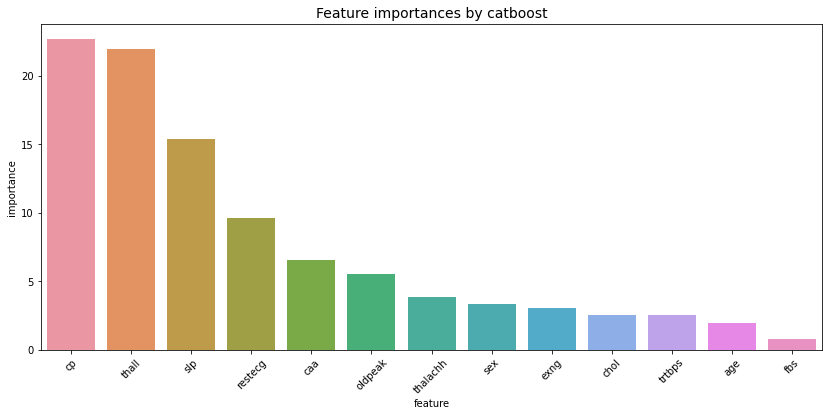

In [57]:
plt.figure(figsize=(14,6))
sns.barplot(data=final_importance, x='feature', y='importance')
plt.xticks(rotation=45)
plt.title('Feature importances by catboost', fontsize=14)
plt.show()